# <center> Numpy_study3 </center>

## 1. axis 이해하기
 - 몇몇 함수에는 axis keyword 파라미터가 존재
 - axis값이 없는 경우에는 전체 데이터에 대해 적용
 - axis값이 있는 경우에는, 해당 axis를 **따라서** 연산 적용

* axis를 파라미터로 갖는 함수를 이용하기
 - 거의 대부분의 연산 함수들이 axis 파라미터를 사용
 - 이 경우, 해당 값이 주어졌을 때, 해당 axis를 **따라서** 연산이 적용
   - 따라서 결과는 해당 axis가 제외된 나머지 차원의 데이터만 남게 됨
 - 예) np.sum, np.mean, np.any 등등

In [2]:
import numpy as np

x = np.arange(15)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


* 1차원 데이터에 적용하기

In [2]:
np.sum(x, axis=0)

105

In [3]:
np.sum(x, axis=1)      # 에러

AxisError: axis 1 is out of bounds for array of dimension 1

* 행렬에 적용하기

In [4]:
y = x.reshape(3, 5)
print(y)

np.sum(y, axis = 0)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([15, 18, 21, 24, 27])

In [5]:
y = x.reshape(3, 5)
print(y)

np.sum(y, axis = 1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([10, 35, 60])

* 3차원 텐서에 적용하기

In [6]:
z = np.arange(36).reshape(3, 4, 3)
print(z)

np.sum(z, axis=0)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]


array([[36, 39, 42],
       [45, 48, 51],
       [54, 57, 60],
       [63, 66, 69]])

In [7]:
np.sum(z, axis=1)

array([[ 18,  22,  26],
       [ 66,  70,  74],
       [114, 118, 122]])

In [8]:
np.sum(z, axis=2)

array([[  3,  12,  21,  30],
       [ 39,  48,  57,  66],
       [ 75,  84,  93, 102]])

In [9]:
np.sum(z, axis=-3)

array([[36, 39, 42],
       [45, 48, 51],
       [54, 57, 60],
       [63, 66, 69]])

* axis의 값이 튜플일 경우
 - 해당 튜플에 명시된 모든 axis에 대해서 연산

In [10]:
print(z)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]


In [11]:
np.sum(z, axis=(0, 2))

array([117, 144, 171, 198])

## 2. 브로드캐스팅 이해하기

#### 브로드캐스팅
  - Shape이 같은 두 ndarray에 대한 연산은 각 원소별로 진행
  - 연산되는 두 ndarray가 다른 Shape을 갖는 경우 브로드 캐스팅(Shape을 맞춤) 후 진행

#### 브로드캐스팅 Rule
 - [공식문서](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#general-broadcasting-rules)
 - 뒷 차원에서 부터 비교하여 Shape이 같거나, 차원 중 값이 1인 것이 존재하면 가능

![브로드캐스팅 예](https://www.tutorialspoint.com/numpy/images/array.jpg)
    - 출처: https://www.tutorialspoint.com/numpy/images/array.jpg 

* Shape이 같은 경우의 연산

In [12]:
x = np.arange(15).reshape(3, 5)
y = np.random.rand(15).reshape(3, 5)
print(x)
print(y)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[0.60684427 0.74851629 0.69810287 0.82427233 0.31705199]
 [0.79125705 0.6802687  0.53468368 0.90190235 0.66394502]
 [0.666871   0.33499715 0.1026576  0.02707525 0.91204933]]


In [13]:
x * y

array([[ 0.        ,  0.74851629,  1.39620574,  2.47281699,  1.26820797],
       [ 3.95628523,  4.0816122 ,  3.74278577,  7.21521883,  5.97550516],
       [ 6.66870999,  3.68496865,  1.23189115,  0.35197829, 12.76869059]])

* Scalar(상수)와의 연산

In [14]:
x % 2 == 0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]])

* Shape이 다른 경우 연산

In [51]:
a = np.arange(12).reshape(4, 3)
b = np.arange(100, 103) # 벡터 
c = np.arange(1000, 1004)
d = b.reshape(1, 3) # 벡터 -> 행렬 

print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(a)
print(b)
print(c)
print(d)

(4, 3)
(3,)
(4,)
(1, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[100 101 102]
[1000 1001 1002 1003]
[[100 101 102]]


In [16]:
a + b

array([[100, 102, 104],
       [103, 105, 107],
       [106, 108, 110],
       [109, 111, 113]])

In [18]:
a + c

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [17]:
a + d

array([[100, 102, 104],
       [103, 105, 107],
       [106, 108, 110],
       [109, 111, 113]])

## 3. Boolean indexing 이해하기

#### Boolean indexing
  - ndarry 인덱싱 시, bool 리스트를 전달하여 True인 경우만 필터링

* 브로드캐스팅을 활용하여 ndarray로 부터 bool list 얻기
 - 예) 짝수인 경우만 찾아보기

In [19]:
x = np.random.randint(1, 100, size=10)
print(x)

[24 56 19 18 12 75 25 21 82 92]


In [20]:
even_mask = x % 2 == 0
print(even_mask)

[ True  True False  True  True False False False  True  True]


- bool 리스트를 인덱스로 전달

In [21]:
x[even_mask]

array([24, 56, 18, 12, 82, 92])

In [22]:
x[x % 2 == 0]

array([24, 56, 18, 12, 82, 92])

In [23]:
x[x > 30]

array([56, 75, 82, 92])

####  다중조건 사용하기
 - 파이썬 논리 연산자인 and, or, not 키워드 사용 불가
 - & - AND 
 - | - OR 

In [24]:
x % 2 == 0
x < 30

x[(x % 2 == 0) & (x < 30)]

array([24, 18, 12])

In [25]:
x < 30
x > 50

x[(x < 30) | (x > 50)]

array([24, 56, 19, 18, 12, 75, 25, 21, 82, 92])

#### ex. 2019년 7월 서울 평균기온 데이터
 - 평균기온이 25도를 넘는 날수는?
 - 평균기온이 25를 넘는 날의 평균 기온은?

In [26]:
temp = np.array(
        [23.9, 24.4, 24.1, 25.4, 27.6, 29.7,
         26.7, 25.1, 25.0, 22.7, 21.9, 23.6, 
         24.9, 25.9, 23.8, 24.7, 25.6, 26.9, 
         28.6, 28.0, 25.1, 26.7, 28.1, 26.5, 
         26.3, 25.9, 28.4, 26.1, 27.5, 28.1, 25.8])

In [27]:
len(temp)

31

In [56]:
len(temp[temp > 25.0])

21

In [29]:
np.sum(temp > 25.0)

21

In [30]:
np.mean(temp[temp > 25.0])

26.857142857142858

## 4. linalg 서브모듈 함수 활용하여 선형대수 연산하기

#### np.linalg.inv
 - 역행렬을 구할 때 사용
 - 모든 차원의 값이 같아야 함

In [5]:
x = np.random.rand(3, 3, 3)        # 정방행렬(Squared Matrix)만 가능 (= 차원의 값이 같아야함.)
print(x)

np.matmul(x, np.linalg.inv(x))      # np.matumul = 행렬의 곱
x @ np.linalg.inv(x)                # @ = 행렬의 곱 

[[[0.53393117 0.22481928 0.85296483]
  [0.46848407 0.89976735 0.56587148]
  [0.35083469 0.07691757 0.33806502]]

 [[0.13171533 0.51304165 0.17615238]
  [0.9458068  0.27442291 0.70787063]
  [0.64435386 0.50183117 0.9783686 ]]

 [[0.55754308 0.35548439 0.29144695]
  [0.17677772 0.38054262 0.05147495]
  [0.4267006  0.15574785 0.24093757]]]


array([[[ 1.00000000e+00, -1.99267485e-17,  5.08573872e-18],
        [-1.39017876e-16,  1.00000000e+00,  4.52282340e-16],
        [ 2.73646921e-17, -9.25550362e-18,  1.00000000e+00]],

       [[ 1.00000000e+00, -3.32609579e-17,  3.00678437e-17],
        [-1.66728841e-17,  1.00000000e+00,  9.41529659e-17],
        [ 4.57826554e-17, -3.67580185e-17,  1.00000000e+00]],

       [[ 1.00000000e+00, -9.22625155e-14,  1.11053672e-13],
        [-7.72559109e-15,  1.00000000e+00, -5.95650604e-14],
        [ 1.35009294e-13, -1.90953985e-13,  1.00000000e+00]]])

#### np.linalg.solve
 - Ax = B 형태의 선형대수식 솔루션을 제공
 - 예제) 호랑이와 치타의 합 : 25, 호랑이 다리와 치타 다리의 합은 64
   - x + y = 25
   - 2x + 4y = 64
   
 $$\begin{pmatrix} 1 & 1 \\ 2 & 4 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} 25 \\ 64 \end{pmatrix}$$

In [6]:
A = np.array([[1, 1], [2, 4]])
B = np.array([25, 64])

x = np.linalg.solve(A, B)
print(x)

np.allclose(A@x, B)            # A와 x를 곱한 것과 B를 비교 (np.allclose) -> True or False
                               # 모델이 복잡해질수록 많이 사용되지는 않지만 기본적으로 linear한 관계의 문제를 풀 때 사용될 수 있음.

[18.  7.]


True

##  5. matplotlib 모듈 이용하여 그래프 표현하기

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

### 그래프 데이터 생성

In [34]:
x = np.linspace(0, 10, 11)
y = x ** 2 + x + 2 + np.random.randn(11)          # np.random.randn()을 통해 noise 추가

print(x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  2.62347301   4.68771249   8.11679222  15.86335665  22.53205633
  31.66746119  47.06736966  58.29272201  75.96436553  92.30444416
 111.83755392]


### 그래프 출력하기
 - plot함수 (선 그래프), scatter(점 그래프), hist(히스토그램) 등 사용
   - 함수의 parameter 혹은 plt의 다른 함수로 그래프 형태 및 설정을 변경 가능
   - 기본적으로, x, y에 해당하는 값이 필요

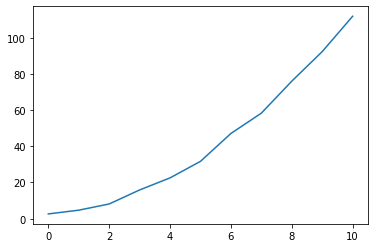

In [35]:
plt.plot(x, y)

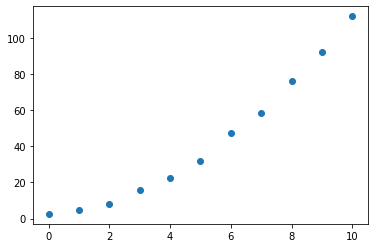

In [36]:
plt.scatter(x, y)

### 그래프에 주석 추가 

* **x, y 축 및 타이틀**

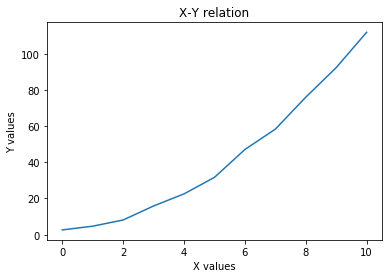

In [37]:
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X-Y relation')
plt.plot(x, y)

* **grid 추가**

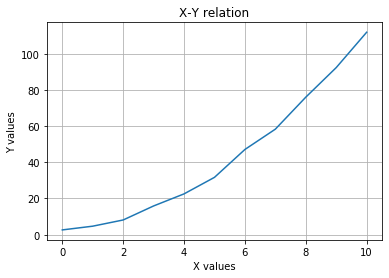

In [38]:
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X-Y relation')
plt.grid(True)
plt.plot(x, y)

* **x, y축 범위 지정**

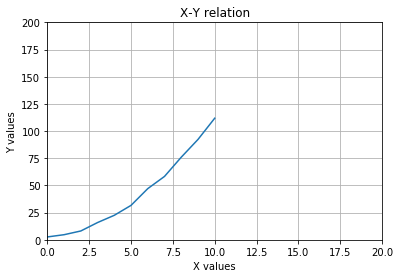

In [39]:
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X-Y relation')
plt.grid(True)

plt.xlim(0, 20)
plt.ylim(0, 200)

plt.plot(x, y)

### plot 함수 parameters
 - 그래프의 형태에 대한 제어 가능
 - [plot함수 도큐먼트](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

* 그래프의 색상 변경

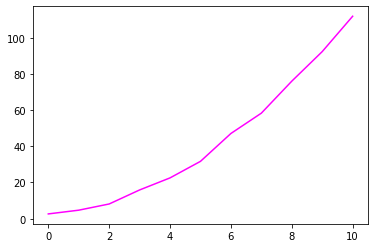

In [40]:
plt.plot(x, y, '#ff00ff')

* 그래프 선스타일 변경

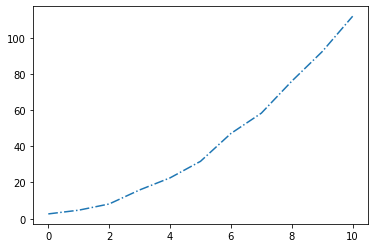

In [41]:
plt.plot(x, y, '-.')

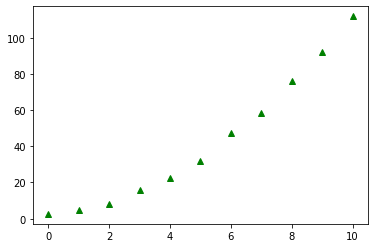

In [42]:
plt.plot(x, y, 'g^')

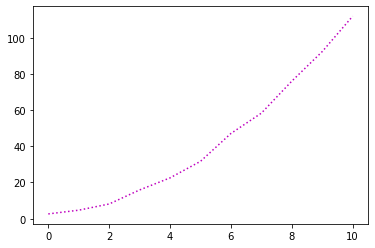

In [43]:
plt.plot(x, y, 'm:')

* 그래프 두께 변경
 - linewidth 명시

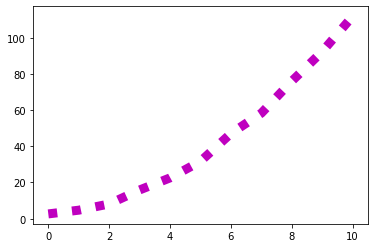

In [44]:
plt.plot(x, y, 'm:', linewidth=9)

* keyword parameter 이용하여 모든 속성 설정
 - https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
 - color
 - linestyle
 - marker
 - markerfacecolor
 - markersize 등등

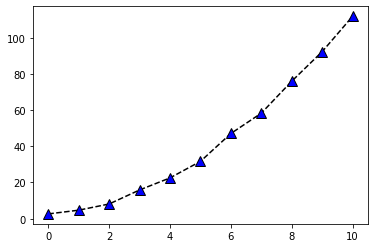

In [45]:
plt.plot(x, y, color='black', 
          linestyle='--', marker='^',
         markerfacecolor='blue', markersize=10)

### subplot으로 여러 그래프 출력하기
 - subplot함수로 구획을 구별하여 각각의 subplot에 그래프 출력

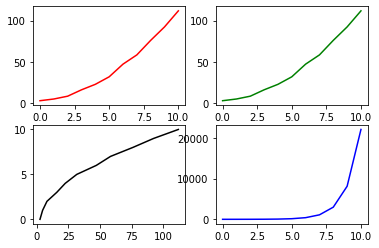

In [46]:
plt.subplot(2, 2, 1)
plt.plot(x, y, 'r')

plt.subplot(2, 2, 2)
plt.plot(x, y, 'g')

plt.subplot(2, 2, 3)
plt.plot(y, x, 'k')

plt.subplot(2, 2, 4)
plt.plot(x, np.exp(x), 'b')

### hist함수 사용
 - histogram 생성
 - bins로 historgram bar 개수 설정

In [47]:
data = np.random.randint(1, 100, size=200)
print(data)

[15 78 90 54 44 45 84  2  3 94 77 44 16 97 68  3 11 96 99 77 23 45 45 29
 27 89  6 82 56 67 46 26 51 43 25 60 19 50 46 97 82 16 60 67 76 44 69 81
 95 34 90 26 71 90 87 37 53 71 61 26 31 91 86  5 80 54 63 93 32 81 81 15
 89 39 49 60 80 92 75 56 36 79 71 36 57 24  3 31 46 21 48 57 24 10 88 86
 15 77 49 96 76 61 37 69 12 64 65 40 28 91 48  5 72 24 51  5 90 61  6 45
 51 37 73  5 55 64 36 20 62 59 51 76 65 78  1 41 13 44 72 24 25 56 50 29
 70 90 44 83 97 74 42 86 70 14 72 31 81 18  1 40 84 12 45 28 29 10  3 70
 96  9  9 84 60 59 29 21 68 97 86 88 73  1 82 79 87 66 37  4 84 36 41 80
  8 42 72 19 89 17 50 25]


C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44050 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing f

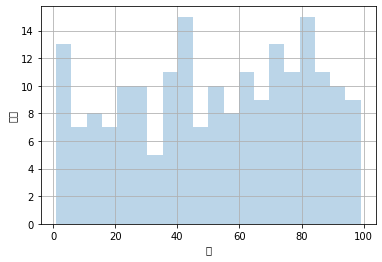

In [48]:
plt.hist(data, bins=20, alpha=0.3)
plt.xlabel('값')
plt.ylabel('개수')
plt.grid(True)

## 6. 연습문제

 1. 로또 번호 자동 생성기(함수로)를 만드시오
 2. numpy를 이용하여 pi(원주율) 값을 계산하시오
  - 몬테 카를로 방법 이용하기
  - 파이 값 구하기

In [10]:
# pi/4 : 1 = (4분원 안에 생성된 점 개수) : 전체  시도 횟수
# pi = 4 * (4분원 안에 생성된 점 개수) / 1e7

In [ ]:
#### 1번

In [9]:
def generate_lotto_nums():
    return np.random.choice(np.arange(1, 46), size=6, replace=False)
    
generate_lotto_nums()

array([37, 25, 32, 10,  4, 43])

In [ ]:
#### 2번

In [8]:
total = int(1e7)
points = np.random.rand(total, 2)
4 * np.sum(np.sum(points ** 2, axis=1) < 1) / total

3.1409084